<img src="https://1000logos.net/wp-content/uploads/2017/11/Zillow-Logo.png" title="Zillow Logo"/>

## INTRODUCTION

## GOALS
- Identify drivers of logerror.
- Use clustering algorithms to identify predictors of logerror so that we can improve predictive property value models.
- use clustering algorithms and adapt them to the predictive model to beat the baseline model.

## PLAN
### 1. [Acquire Data](#Acquire)
### Takeaways:
- Data is collected from the codeup cloud database with an appropriate SQL query.
- Data is imported using an acquire.py file.
- Original dataframe consisted of 71858 rows × 69 columns.
- Null values/ missing data are very common in about 50 percent of the data. 
 
### 2. [Prepare](#Prepare)
### - using [wrangle.py]()
### Takeaways:
- Bfore cleaning data and dropping unnecesary columns, 71858 rows × 69 columns.
- After dropping nulls and collumns, 44679 rows × 12 columns.
- resulted in 62% row retention 17% column retention.
- we continued to split the data into train, validate, and test for exploration and modeling purposes.

### 3. [Explore](#Explore)

***

### Importing the files below will grant you access to the correct visuals and calculations that will be presented

In [1]:
# fetches the data.
import acquire
# credentials file to access the data.
import env
# Imports functions necessary to clean and set limits for the data.
import wrangle

# coding 
import math
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import scipy.stats
import scipy
import os

# needed for modeling
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans

# cluster data imports 
import explore

# Acquire

In [2]:
# importing and aquiring data set
df = acquire.get_zillow_data()
df

,propertylandusetypeid,parcelid,storytypeid,typeconstructiontypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,id.1,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,typeconstructiondesc,storydesc,propertylandusedesc
0,261.0,14297519,NaN,NaN,NaN,NaN,NaN,NaN,1727539,NaN,...,0,0.025595,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Single Family Residential
1,261.0,17052889,NaN,NaN,NaN,NaN,NaN,NaN,1387261,NaN,...,1,0.055619,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Single Family Residential
2,261.0,14186244,NaN,NaN,NaN,NaN,NaN,NaN,11677,NaN,...,2,0.005383,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Single Family Residential
3,261.0,12177905,NaN,NaN,2.0,NaN,NaN,NaN,2288172,NaN,...,3,-0.103410,2017-01-01,NaN,NaN,NaN,Central,NaN,NaN,Single Family Residential
4,266.0,10887214,NaN,NaN,2.0,NaN,NaN,1.0,1970746,NaN,...,4,0.006940,2017-01-01,Central,NaN,NaN,Central,NaN,NaN,Condominium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71853,261.0,11000655,NaN,NaN,2.0,NaN,NaN,NaN,673515,NaN,...,77609,0.020615,2017-09-20,NaN,NaN,NaN,Central,NaN,NaN,Single Family Residential
71854,261.0,17239384,NaN,NaN,NaN,NaN,NaN,NaN,2968375,NaN,...,77610,0.013209,2017-09-21,NaN,NaN,NaN,NaN,NaN,NaN,Single Family Residential
71855,261.0,12773139,NaN,NaN,2.0,NaN,NaN,1.0,1843709,NaN,...,77611,0.037129,2017-09-21,Central,NaN,NaN,Central,NaN,NaN,Single Family Residential
71856,261.0,12826780,NaN,NaN,2.0,NaN,NaN,NaN,1187175,NaN,...,77612,0.007204,2017-09-25,NaN,NaN,NaN,Central,NaN,NaN,Single Family Residential


[PLAN](#PLAN)
# Prepare

In [3]:
# range of out liers 1.5 is recomended 
k = 1.5
#creating a cols value of columns that we want for the outliers to be handled
cols = ['bathroomcnt', 'bedroomcnt','calculatedfinishedsquarefeet','yearbuilt','lotsizesquarefeet']    

df = wrangle.handle_outliers(df,cols,k)
df = wrangle.get_exploration_data(df)
df

Before dropping nulls, 49964 rows, 69 cols
Before dropping nulls, 49964 rows, 69 cols
After dropping nulls. 44092 rows. 12 cols
After dropping nulls, 44092 rows, 12 cols


,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror
1,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,13091.0,97099.0,1967.0,464000.0,0.055619
2,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,21412.0,97078.0,1962.0,564778.0,0.005383
3,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,396551.0,96330.0,1970.0,145143.0,-0.103410
5,2.0,3.0,1492.0,6111.0,34230044.0,-118993991.0,903.0,51239.0,97091.0,1982.0,331064.0,-0.020526
7,1.0,2.0,738.0,6037.0,34149214.0,-118239357.0,4214.0,45457.0,96325.0,1922.0,218552.0,0.101723
...,...,...,...,...,...,...,...,...,...,...,...,...
71851,2.0,4.0,1633.0,6037.0,33870815.0,-118070858.0,4630.0,30267.0,96204.0,1962.0,346534.0,0.001082
71854,2.0,4.0,1612.0,6111.0,34300140.0,-118706327.0,12105.0,27110.0,97116.0,1964.0,67205.0,0.013209
71855,1.0,3.0,1032.0,6037.0,34040895.0,-118038169.0,5074.0,36502.0,96480.0,1954.0,49546.0,0.037129
71856,2.0,3.0,1762.0,6037.0,33937685.0,-117996709.0,6347.0,14634.0,96171.0,1955.0,522000.0,0.007204


# Clustering the data
- resulting in 3 seperate cluster
[PLAN](#PLAN)

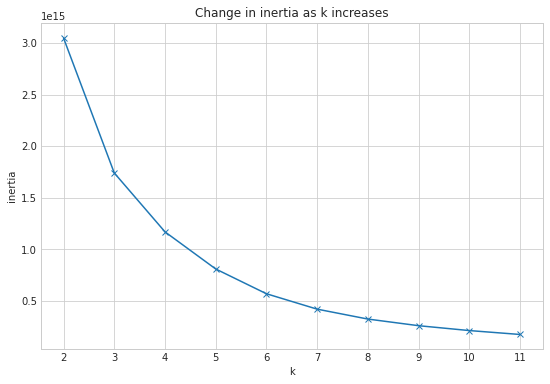

In [4]:
# building and X to start clustering
X = df[['bathroomcnt', 'calculatedfinishedsquarefeet','bedroomcnt','yearbuilt','taxvaluedollarcnt']]
with plt.style.context('seaborn-whitegrid'):
    #graph size
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


### Takeways:
- 3 point inertia drop from 2-3
- 1 point inertia drop from 3-4

### Conclusion:
- we will create 3 clusters

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X) 
#creating a new dataframe
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

In [6]:
#making a dataframe for the new clusters.
df['cluster'] = kmeans.predict(X)
df.groupby('cluster')['bathroomcnt', 'calculatedfinishedsquarefeet','bedroomcnt','yearbuilt','taxvaluedollarcnt'].mean()
    

,bathroomcnt,calculatedfinishedsquarefeet,bedroomcnt,yearbuilt,taxvaluedollarcnt
cluster,,,,,
0,2.396131,1951.615107,3.305306,1965.897642,6.684081e+05
1,1.926236,1492.255341,3.018488,1959.383457,2.311001e+05
2,2.783486,2355.577626,3.344749,1957.449772,1.842182e+06


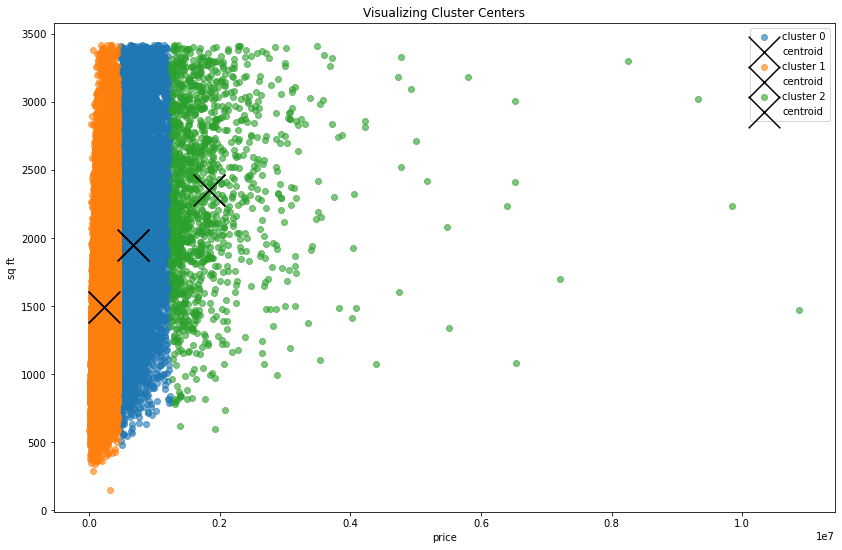

In [7]:
#graph size 
plt.figure(figsize=(14, 9))
#graphing after weve clustered using a scatter plot
for cluster, subset in df.groupby('cluster'):

        plt.scatter(subset.taxvaluedollarcnt, subset.calculatedfinishedsquarefeet, label='cluster ' + str(cluster), alpha=.6)

        centroids.plot.scatter(y='calculatedfinishedsquarefeet', x='taxvaluedollarcnt', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

        plt.legend()
        plt.xlabel('price')
        plt.ylabel('sq ft')
        plt.title('Visualizing Cluster Centers')

In [8]:
cluster1 = df[df.cluster == 0]
cluster2 = df[df.cluster == 1]
cluster3 = df[df.cluster == 2]

In [9]:
#clsuter 1 data
cluster1

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror,cluster
1,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,13091.0,97099.0,1967.0,464000.0,0.055619,0
2,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,21412.0,97078.0,1962.0,564778.0,0.005383,0
15,2.0,4.0,1677.0,6059.0,33642800.0,-117707211.0,5304.0,32380.0,96962.0,1981.0,528847.0,-0.021896,0
20,2.5,3.0,2074.0,6059.0,33586693.0,-117697202.0,5600.0,25458.0,96971.0,1978.0,597213.0,-0.006653,0
21,2.5,3.0,2018.0,6059.0,33728985.0,-117754647.0,2800.0,52650.0,96954.0,1998.0,534612.0,0.044309,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71820,3.0,4.0,2180.0,6037.0,33885900.0,-118373000.0,7509.0,33612.0,96124.0,1973.0,797109.0,0.064191,0
71821,2.0,4.0,1689.0,6037.0,34106193.0,-117830253.0,8028.0,33836.0,96513.0,1978.0,574000.0,-0.016622,0
71832,3.0,3.0,1774.0,6037.0,34158519.0,-118451574.0,5834.0,12447.0,96412.0,1949.0,796324.0,0.002138,0
71843,2.0,3.0,1472.0,6037.0,34123355.0,-118180658.0,4454.0,12447.0,96023.0,1927.0,603333.0,-0.062404,0


In [10]:
#clsuter 2 data
cluster2

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror,cluster
3,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,396551.0,96330.0,1970.0,145143.0,-0.103410,1
5,2.0,3.0,1492.0,6111.0,34230044.0,-118993991.0,903.0,51239.0,97091.0,1982.0,331064.0,-0.020526,1
7,1.0,2.0,738.0,6037.0,34149214.0,-118239357.0,4214.0,45457.0,96325.0,1922.0,218552.0,0.101723,1
8,3.0,4.0,3039.0,6037.0,33960230.0,-118006914.0,20028.0,14634.0,96173.0,1970.0,220583.0,-0.040966,1
10,3.0,4.0,2540.0,6037.0,34434971.0,-118464390.0,10384.0,54311.0,96374.0,1999.0,430108.0,0.005963,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71850,2.0,3.0,1570.0,6037.0,34194943.0,-118629218.0,7499.0,12447.0,96342.0,1958.0,72026.0,0.081196,1
71851,2.0,4.0,1633.0,6037.0,33870815.0,-118070858.0,4630.0,30267.0,96204.0,1962.0,346534.0,0.001082,1
71854,2.0,4.0,1612.0,6111.0,34300140.0,-118706327.0,12105.0,27110.0,97116.0,1964.0,67205.0,0.013209,1
71855,1.0,3.0,1032.0,6037.0,34040895.0,-118038169.0,5074.0,36502.0,96480.0,1954.0,49546.0,0.037129,1


In [11]:
#clsuter 3 data
cluster3

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror,cluster
96,2.5,3.0,3011.0,6059.0,33628725.0,-117873172.0,6944.0,53571.0,96978.0,1973.0,1441252.0,-0.201121,2
132,3.0,4.0,3107.0,6037.0,34154597.0,-118514596.0,17166.0,12447.0,96349.0,1957.0,1279125.0,-0.013062,2
168,2.5,3.0,2134.0,6059.0,33624386.0,-117919255.0,6375.0,53571.0,96981.0,1995.0,1794000.0,0.048630,2
268,2.0,3.0,1956.0,6037.0,34040419.0,-118480389.0,8008.0,26964.0,96150.0,1927.0,2715793.0,-0.088941,2
277,3.0,4.0,2409.0,6037.0,34038659.0,-118498682.0,7521.0,26964.0,96149.0,1927.0,2100270.0,-0.206738,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71745,3.0,3.0,1687.0,6037.0,34053344.0,-118474937.0,6999.0,12447.0,96030.0,1947.0,2000000.0,0.075964,2
71752,2.0,3.0,2240.0,6037.0,34030263.0,-118838416.0,9533.0,12520.0,96116.0,1977.0,1582000.0,0.073576,2
71779,3.0,4.0,3148.0,6037.0,33891606.0,-118389223.0,7001.0,19177.0,96117.0,1993.0,2082201.0,0.035489,2
71807,2.0,3.0,1467.0,6037.0,33899557.0,-118399615.0,4643.0,19177.0,96117.0,1951.0,1629476.0,0.028893,2


[PLAN](#PLAN)
# Split Data

In [12]:
train, validate, test = explore.split_clusters(cluster1)

Train: 9227 rows, 13 cols
Validate: 2307 rows, 13 cols
Test: 2036 rows, 13 cols
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9227 entries, 19904 to 46853
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   9227 non-null   float64
 1   bedroomcnt                    9227 non-null   float64
 2   calculatedfinishedsquarefeet  9227 non-null   float64
 3   fips                          9227 non-null   float64
 4   latitude                      9227 non-null   float64
 5   longitude                     9227 non-null   float64
 6   lotsizesquarefeet             9227 non-null   float64
 7   regionidcity                  9227 non-null   float64
 8   regionidzip                   9227 non-null   float64
 9   yearbuilt                     9227 non-null   float64
 10  taxvaluedollarcnt             9227 non-null   float64
 11  logerror                      9227 n

[PLAN](#PLAN)
# Explore

###  ? Does logerror differ across bathroomcnt, bedroomcnt, calculatedfinishedsquarefeet, yearbuilt, & taxvaluedollarcnt ?

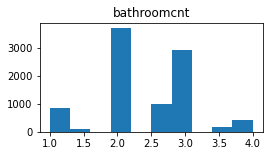

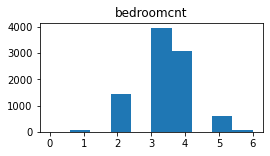

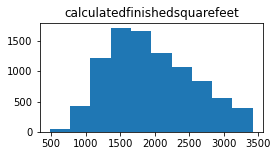

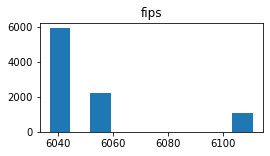

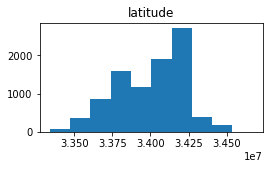

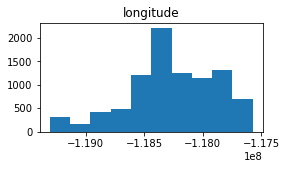

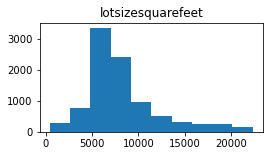

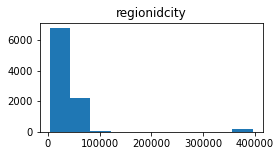

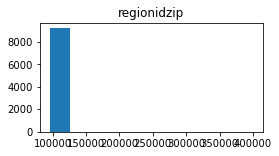

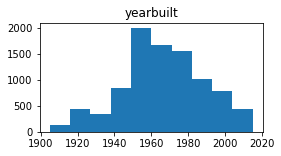

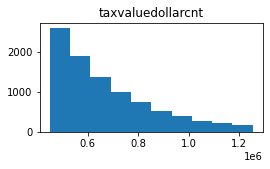

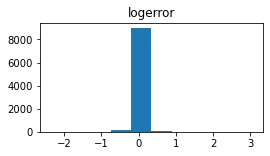

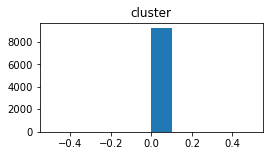

In [13]:
explore.explore_files(train)

### Takeaways:
- logerror, yearbuilt, calculatedsquarefeet, bedroom and bathroom tend to have a skew to the right.
- using this info we will run a simple correlation test.

# Hypothesis:
### Is there a correlation between bathroomcnt & logerror ?
- Null Hypothesis  = there is no correlation between the bathroomcnt of a home and logerror.

- Alternative Hypothesis  = there is a correlation between the bathroomcnt of a home and logerror.

### Is there a correlation between calculatedfinishedsquarefeet & logerror ?
- Null Hypothesis  = there is no correlation between the calculatedfinishedsquarefeet of a home and logerror.

- Alternative Hypothesis  = there is a correlation between the calculatedfinishedsquarefeet of a home and logerror.

### Is there a correlation between bedroomcnt & logerror ?
- Null Hypothesis  = there is no correlation between the bedroomcnt  of a home and logerror.

- Alternative Hypothesis  = there is a correlation between the bedroomcnt  of a home and logerror.

### Is there a correlation between yearbuilt & logerror ?
- Null Hypothesis  = there is no correlation between the yearbuilt  of a home and logerror.

- Alternative Hypothesis  = there is a correlation between the yearbuilt  of a home and logerror.

### Is there a correlation between fips & logerror ?
- Null Hypothesis  = there is no correlation between the fips  of a home and logerror

- Alternative Hypothesis  = there is a correlation between the fips  of a home and logerror 

### Is there a correlation between taxvaluedollarcnt & logerror ?
- Null Hypothesis  = there is no correlation between the taxvaluedollarcnt  of a home and logerror.

- Alternative Hypothesis  = there is a correlation between the taxvaluedollarcnt  of a home and logerror.

<AxesSubplot:xlabel='bathroomcnt', ylabel='logerror'>

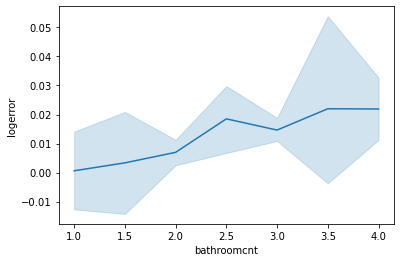

In [14]:
sns.lineplot(data=train, x = 'bathroomcnt' ,y= 'logerror')

<AxesSubplot:xlabel='bedroomcnt', ylabel='logerror'>

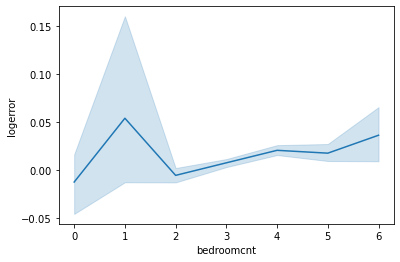

In [15]:
sns.lineplot(data=train, x = 'bedroomcnt' ,y= 'logerror')

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='logerror'>

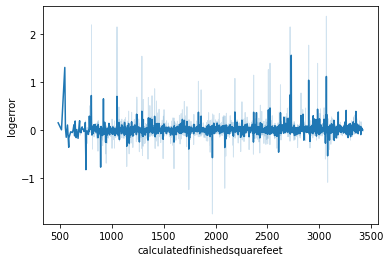

In [16]:
sns.lineplot(data=train, x = 'calculatedfinishedsquarefeet' ,y= 'logerror')

<AxesSubplot:xlabel='yearbuilt', ylabel='logerror'>

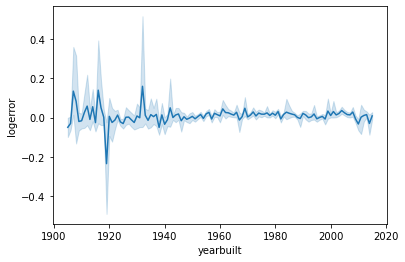

In [17]:
sns.lineplot(data=train, x = 'yearbuilt' ,y= 'logerror')

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='logerror'>

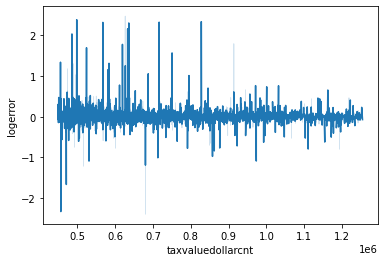

In [18]:
sns.lineplot(data=train, x = 'taxvaluedollarcnt' ,y= 'logerror')

<AxesSubplot:xlabel='fips', ylabel='logerror'>

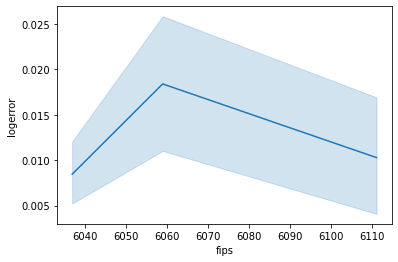

In [19]:
sns.lineplot(data=train, x = 'fips' ,y= 'logerror')

## Results after running a  correlation test.
## Exploration Summary for Cluster 1
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between bathroomcnt and logerror.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between calculatedfinishedsquarefeet and logerror.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between bedroomcnt and logerror.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between yearbuilt and logerror.
- Based on the correlation test above fips and log error have no correlation.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between taxvaluedollarcnt and logerror.

back to [PLAN](#PLAN)

# Modeling:

In [20]:
#features well be working with
features = ['bathroomcnt',
                 'bedroomcnt',
                 'calculatedfinishedsquarefeet',
                 'yearbuilt',
                 'taxvaluedollarcnt',
                 'latitude', 
                 'longitude',
                 'lotsizesquarefeet',
                 'regionidcity',
                 'regionidzip',
                 'fips']
#columns we will be scaling
scale_columns = ['yearbuilt',  
                   'taxvaluedollarcnt', 
                   'bathroomcnt', 
                   'calculatedfinishedsquarefeet','logerror']

X_train = train[['yearbuilt',  
                   'taxvaluedollarcnt', 
                   'bathroomcnt', 
                   'calculatedfinishedsquarefeet']]
y_train = train['logerror']


X_validate = validate[['yearbuilt',  
                   'taxvaluedollarcnt', 
                   'bathroomcnt', 
                   'calculatedfinishedsquarefeet']]
y_validate = validate['logerror']


X_test = test[['yearbuilt',
                   'taxvaluedollarcnt', 
                   'bathroomcnt', 
                   'calculatedfinishedsquarefeet']]
y_test = test['logerror']

def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['yearbuilt',  
                   'taxvaluedollarcnt', 
                   'bathroomcnt', 
                   'calculatedfinishedsquarefeet'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(train[columns_to_scale])
    
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [21]:

scaler, X_train_scaled, X_validate_scaled, X_test_scaled = scale_data(X_train, X_validate, X_test, return_scaler=True)

In [22]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values.
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
# 1. Predict logerror_pred_mean
logerror_pred_mean = y_train.logerror.mean()
# creating a logerror_pred_mean column for my y_train
y_train['logerror_pred_mean'] = y_train.logerror.mean()
# creating a logerror_pred_mean column for my y_validate
y_validate['logerror_pred_mean'] = y_validate.logerror.mean()
# 2. compute logerror_pred_median
# creating a predictive median for y train 
y_train['logerror_pred_median'] = y_train.logerror.median()
# creating a predictive median for y_validate
y_validate['logerror_pred_median'] = y_validate.logerror.median()
# 3. RMSE of logerror_pred_mean
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_mean)**(1/2)
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2),
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))
# 4. RMSE of logerror_pred_median
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_median)**(1/2)
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2),
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))
#predicting y from trained data
#predict rules
model = LinearRegression().fit(X_train_scaled, y_train)
predictions = model.predict(X_train_scaled)
#making a y_test dataframe
y_test = pd.DataFrame(y_test)

RMSE using Mean
Train/In-Sample:  0.15 
Validate/Out-of-Sample:  0.14
RMSE using Median
Train/In-Sample:  0.15 
Validate/Out-of-Sample:  0.14


In [23]:
y_test

,logerror
69445,0.011348
5761,0.060818
14864,0.027245
18728,-0.051381
29589,0.041423
...,...
774,0.052311
19654,-0.038067
18546,0.019033
51609,-0.007003


### LinearRegression (ols)

In [24]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train_scaled, y_train.logerror)

# predict train
y_train['logerror_pred_lars'] = lars.predict(X_train_scaled)

# evaluate: rmse
rmse_train_lars = mean_squared_error(y_train.logerror, y_train.logerror_pred_lars)**(1/2)

# predict validate
y_validate['logerror_pred_lars'] = lars.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train_lars, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lars)

RMSE for Lasso + Lars
Training/In-Sample:  0.1461878880166553 
Validation/Out-of-Sample:  0.13772205497246898


In [25]:
#residuals
y_train['lars_residuals'] = y_train['logerror_pred_lars'] - y_train['logerror']
y_validate['lars_residuals'] = y_validate['logerror_pred_lars'] - y_validate['logerror']


In [26]:
from sklearn.linear_model import LinearRegression
y = pd.DataFrame(y_train.logerror)
X = pd.DataFrame(X_train_scaled)
# assuming X and y are already defined
model = LinearRegression().fit(X, y)
train['yhat'] = model.predict(X)
df = pd.DataFrame(train[['calculatedfinishedsquarefeet','bathroomcnt','bedroomcnt','taxvaluedollarcnt','logerror','yhat']])
df.head()
#creating a baseline from the mean of the target variable
baseline = y.mean()
df['baseline'] = df.logerror.mean()
# turning baseline to int from float
df.baseline = df.baseline.astype(int)
# residual = actual - predicted
df['residual'] = df.logerror - df.yhat
df['baseline_residual'] = df.logerror - df.baseline
print("number to beat", baseline)

number to beat logerror    0.011047
dtype: float64


In [28]:
# calculate R2 the easy way:
from sklearn.metrics import r2_score
r2_score(df.logerror, df.yhat)
metric_df = metric_df.append({
    'model': 'OLS Regressor', 
    'RMSE_validate': rmse_validate_lm,
    'r^2_validate': explained_variance_score(y_validate.logerror, y_validate.logerror_pred_lm)}, ignore_index=True)
metric_df 

NameError: name 'metric_df' is not defined

# Conclusion for Cluster 1:
### The OLS model avove outperformed (lassolars and polynomial regression)
- please reference project notebook for all model information)

Back to [PLAN](#PLAN)